In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [32]:
titanic = pd.read_csv("C:/Users/liamm/OneDrive/Desktop/Data Science Portfolio/Titanic Dataset.csv")
print(np.shape(titanic))
titanic.head(10)

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [33]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
titanic = titanic.drop(columns = ["PassengerId","Name","Cabin"])

In [35]:
titanic.head()
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [36]:
med_age = titanic["Age"].median()
med_fare = titanic["Fare"].median()

In [37]:
titanic["Age"].fillna(med_age, inplace = True)
titanic["Fare"].fillna(med_fare, inplace = True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [38]:
sns.displot(titanic["Age"], kde = True)
sns.displot(titanic["Fare"], kde = True)

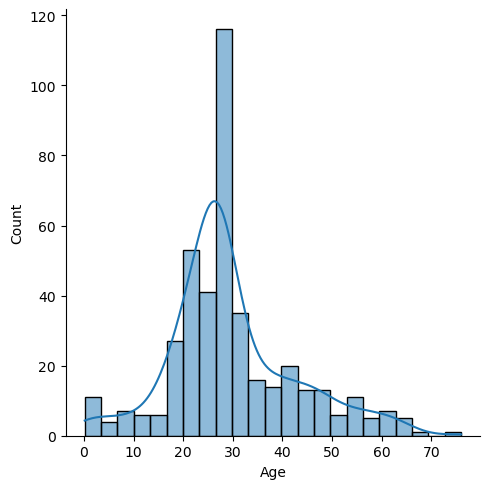

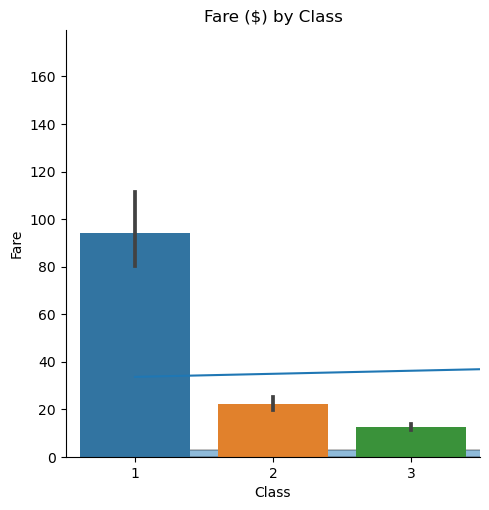

In [39]:
sns.barplot(data = titanic, x = "Pclass", y = "Fare")
plt.title("Fare ($) by Class")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

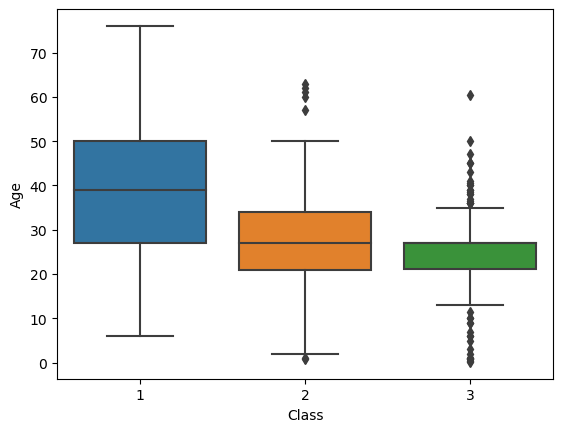

In [40]:
sns.boxplot(data = titanic, x = "Pclass", y = "Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

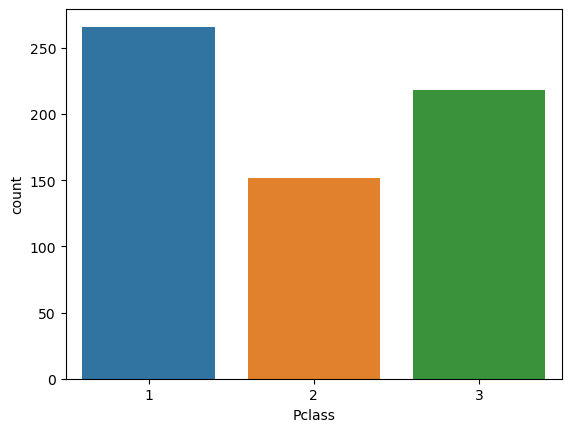

In [41]:
sns.countplot(data = titanic, x = "Sex")
sns.countplot(data = titanic, x = "Pclass")
plt.show()

In [101]:
le = LabelEncoder()
titanic['Ticket'],titanic["Sex"],titanic["Embarked"] = le.fit_transform(titanic["Sex"]),le.fit_transform(titanic["Embarked"]),le.fit_transform(titanic["Ticket"])
corr = titanic.corr()

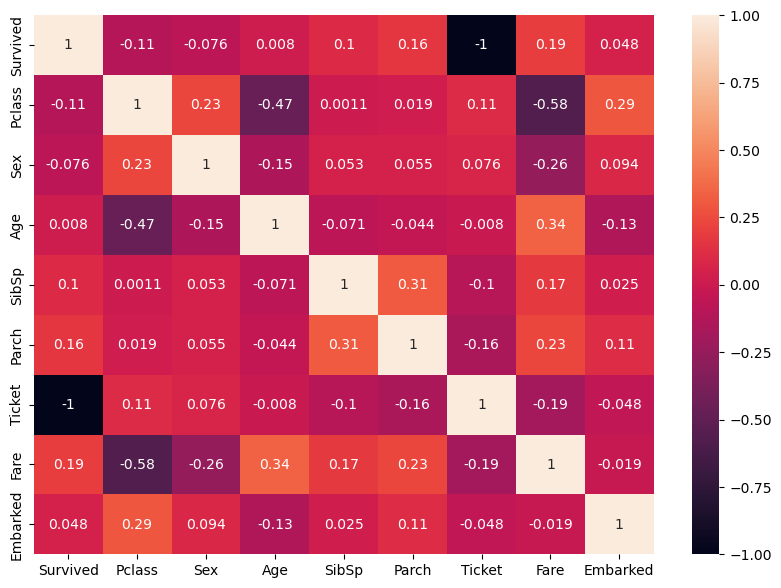

In [102]:
plt.figure(figsize= (10,7))
sns.heatmap(corr, annot = True)
plt.show()

In [114]:
X, y = titanic.drop(columns = "Survived"), titanic["Survived"]
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [104]:
log_reg = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

In [118]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_scaled,y)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best estimator:", grid_search.best_estimator_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 1.0
Best estimator: LogisticRegression(C=0.1)


In [117]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best estimator:", grid_search.best_estimator_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 1.0
Best estimator: LogisticRegression(C=0.1)
